# 🌳 Decision Trees — Intuition, Math, and Construction

A **decision tree** is a supervised learning model that splits data into branches based on feature values, eventually leading to predictions.  
They are **hierarchical models** that mimic human decision-making: at each internal node, we ask a question (e.g., "Is `Age < 30`?") and split data accordingly, moving toward purer subsets.

---

## **1. Intuition**

Imagine sorting fruits based on characteristics:

1. **Root Node:** Ask the most informative question first (e.g., "Is the fruit's size > 5cm?")
2. **Branching:** Depending on the answer (Yes/No), ask more specific questions.
3. **Leaves:** End with predictions (e.g., "Apple", "Orange").

The **goal** at each step is to pick the feature that best separates the classes, so that subsets are as **pure** as possible.

---

## **2. Splitting Criterion — Entropy & Information Gain**

### Entropy
Entropy measures the **impurity** or **uncertainty** in a dataset.

For a node containing $K$ classes, entropy is:

$$
H(S) = -\sum_{k=1}^K p_k \log_2 p_k
$$

Where:
- $p_k$ = proportion of samples in class $k$ at the node
- $H(S)$ is **0** when the node is pure (all samples in one class)
- $H(S)$ is **maximal** when classes are equally distributed

📌 Example: If a node has 8 positive and 2 negative samples:
$$
p_{+} = 0.8, \quad p_{-} = 0.2
$$
$$
H(S) = -[0.8 \log_2 0.8 + 0.2 \log_2 0.2] \approx 0.721
$$

---

### Information Gain
When splitting a node $S$ into subsets $S_1, S_2, \dots, S_m$, the **information gain** (IG) is:

$$
IG(S, A) = H(S) - \sum_{i=1}^m \frac{|S_i|}{|S|} H(S_i)
$$

Where:
- $A$ = the feature we split on
- $|S_i|$ = number of samples in subset $S_i$
- $H(S_i)$ = entropy of subset $S_i$

The higher the $IG$, the better the split.

**Interpretation:**  
We reduce uncertainty by splitting the dataset. $IG$ measures **how much uncertainty is removed** by knowing the value of feature $A$.

---

## **3. How a Decision Tree is Built (Top-Down Induction)**

1. **Start at the root** with all training samples.
2. **For each feature**, compute the **Information Gain** for possible splits.
3. **Choose the split** with the highest $IG$.
4. **Partition** the dataset into branches.
5. **Repeat** recursively for each branch until:
   - Node is pure (entropy = 0), or
   - Maximum depth is reached, or
   - Minimum number of samples per node is met.
6. **Label** leaf nodes with the most common class in that subset.

---

## **4. Example Visualization**

**Structure of a simple decision tree:**

![Decision Tree Example](https://cdn-images-1.medium.com/max/824/0*J2l5dvJ2jqRwGDfG.png)


---

## **5. Key Notes**
- **Advantages:** Easy to interpret, handles both numerical & categorical features, non-parametric.
- **Disadvantages:** Prone to overfitting, unstable to small changes in data.
- **Solution:** Use pruning or ensemble methods (Random Forest, Gradient Boosting).

---

## **6. Summary**
- **Entropy** quantifies impurity.
- **Information Gain** measures the usefulness of a feature split.
- Trees are built **greedily** by picking the best split at each node.
- Can be visualized and interpreted intuitively, but require regularization to avoid overfitting.



# Application to Iris Dataset
1. Exploratory Analysis
2. Creating a Simple Decision Tree
3. Comparing to Sklearn


#

## EDA

## Quick Description of the Iris Dataset

The Iris dataset is a classic dataset used in machine learning, containing measurements of flowers from three species: **setosa**, **versicolor**, and **virginica**. For simplicity, we are focusing on only two classes: **setosa** and **versicolor**.

### Features:
- **Sepal Length** (cm)
- **Sepal Width** (cm)
- **Petal Length** (cm)
- **Petal Width** (cm)

### Target:
- **Setosa** (Class 0)
- **Versicolor** (Class 1)

This subset allows us to explore binary classification using decision trees while reducing complexity.

In [1]:
# Standard imports

import sys
sys.path.append("/Users/rykerdolese/Documents/INDE 577/Data-Science-and-Machine-Learning/src")

# my package imports
from mlpackage import DecisionTreeClassifier, DecisionTreeRegressor
from mlpackage.preprocess import train_test_split
from mlpackage.metrics import accuracy_score, rmse

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('iris.csv')

# Subset to two classes for binary classification
data = data[data['species'].isin(['setosa', 'versicolor'])]

# Subset to Sepal Length and Sepal Width (to make it a bit harder to predict)
data = data[['sepal_length', 'sepal_width', 'species']]
data.head()

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


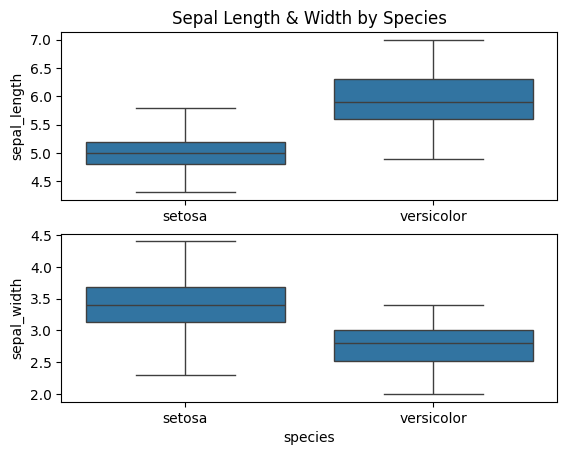

In [12]:
# Sns boxplots for classes and features
import seaborn as sns


# make 4 plots
# Plot 1
plt.subplot(2, 1, 1)
sns.boxplot(x='species', y='sepal_length', data=data)
plt.title('Sepal Length & Width by Species')
plt.xlabel('')
# Plot 2
plt.subplot(2, 1, 2)
sns.boxplot(x='species', y='sepal_width', data=data)

plt.show()


Versicolor has greater sepal length and smaller sepal width, in general.

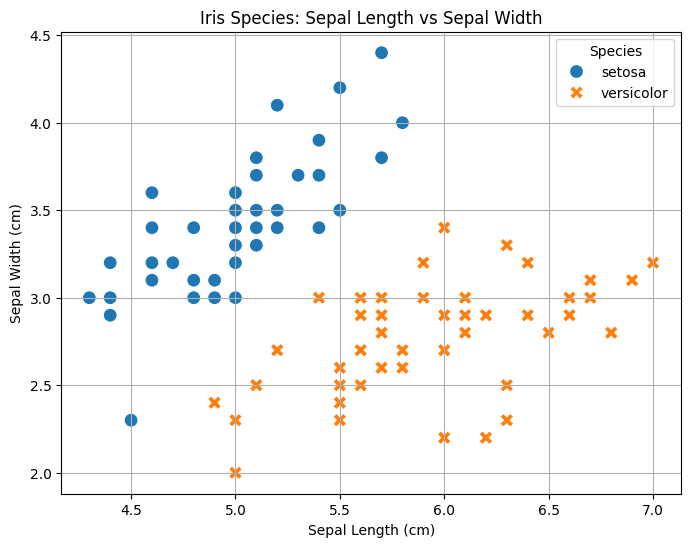

In [13]:
# Let's make a scatterplot and visualize the data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species', style='species', s=100)
plt.title('Iris Species: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()

In [14]:
data['species'] = data['species'].map({'setosa': 0, 'versicolor': 1})

In [ ]:

# Divide data into features and target
X = data[['sepal_length', 'sepal_width']].values
y = data['species'].values

# Split data into training and testing sets
# (We will use a large test size to make it harder for the model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
# Create and train the decision tree
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

# Print the tree structure
print("Decision Tree Structure:")
tree.print_tree()

Decision Tree built successfully.
Decision Tree Structure:
Feature 0 <= 5.4:
  Feature 1 <= 3.0:
    Feature 0 <= 4.9:
      Feature 0 <= 4.5:
        Class: 0
      Feature 0 > 4.5:
        Class: 0
    Feature 0 > 4.9:
      Class: 1
  Feature 1 > 3.0:
    Class: 0
Feature 0 > 5.4:
  Feature 1 <= 3.3:
    Class: 1
  Feature 1 > 3.3:
    Class: 0


Accuracy: 96.67%


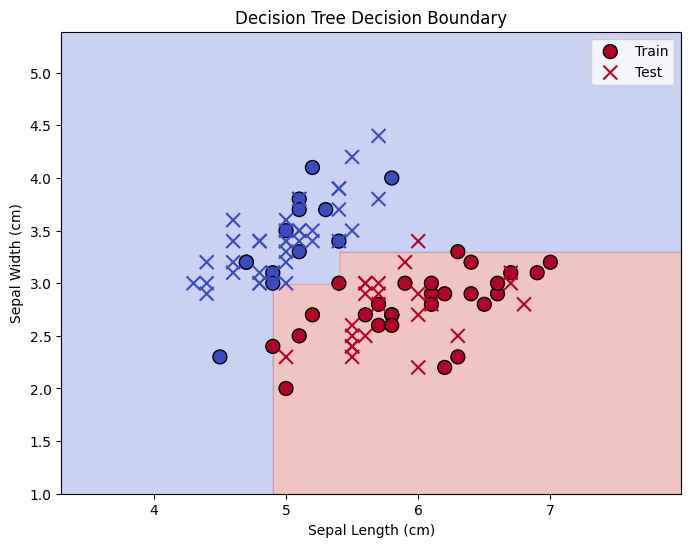

In [16]:
## Make predictions on the test set
y_pred = tree.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Plot the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                   np.arange(y_min, y_max, 0.01))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', label='Train', s=100, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test,  marker='x', label='Test', s=100, cmap='coolwarm')
plt.title('Decision Tree Decision Boundary')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

Our model is almost 100% accurate! Obviously, this task is not too difficult, but it's nice to see our model is making good decisions. We can see that decision trees can create non-linear decision boundaries, something many of the other models cannot do. However, decision trees, if left without limiting the number of splits, can lead to overfitting

### Let's make a simpler tree and see how it fares

In [ ]:
# Let's try with a different max depth
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

Decision Tree built successfully.


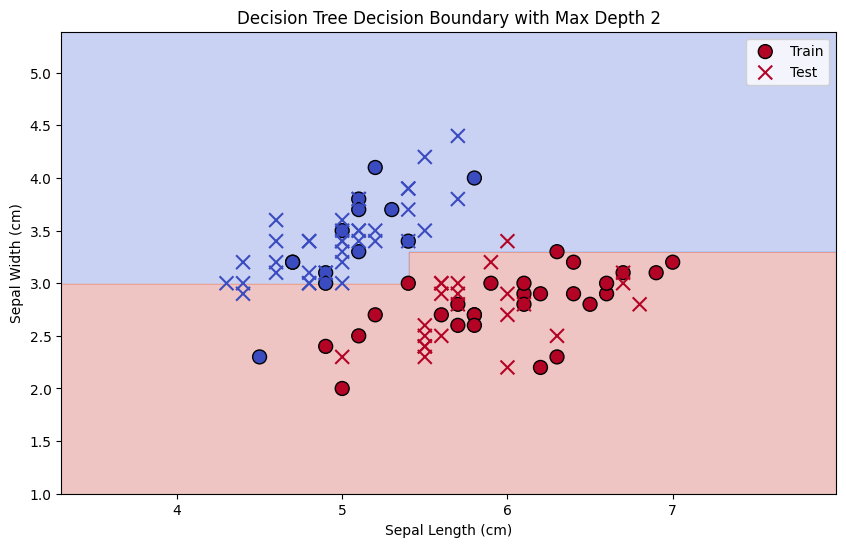

In [8]:
# Let's visualize the data
plt.figure(figsize=(10, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                   np.arange(y_min, y_max, 0.01))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', label='Train', s=100, cmap='coolwarm')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test', s=100, cmap='coolwarm')
plt.title('Decision Tree Decision Boundary with Max Depth 2')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

In [9]:
# Accuracy
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with max depth 2: {accuracy * 100:.2f}%")


Accuracy with max depth 2: 88.33%


The performance is still good, just with two splits!

#### Comparison to Sklearn Package

Scikit-learn Decision Tree Accuracy with max depth 2: 90.00%


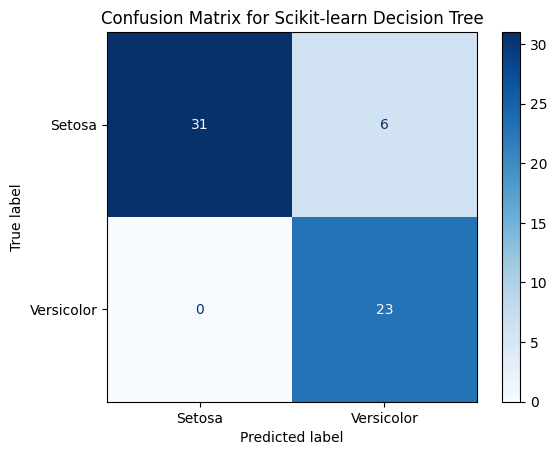

In [10]:
## Comparison to 2-split tree from scikit-learn
from sklearn.tree import DecisionTreeClassifier
# Create and train the decision tree using scikit-learn
sklearn_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
sklearn_tree.fit(X_train, y_train)
# Make predictions using the scikit-learn tree
y_pred_sklearn = sklearn_tree.predict(X_test)
# Calculate accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-learn Decision Tree Accuracy with max depth 2: {accuracy_sklearn * 100:.2f}%")

# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(sklearn_tree, X_test, y_test, cmap='Blues', display_labels=['Setosa', 'Versicolor'])
plt.title('Confusion Matrix for Scikit-learn Decision Tree')
plt.show()

Scikit-learn's version produces very similar results. We can see that all the mislabels are true 'setosa' labels that were classified as 'versicolor'.

### Visualizing a Tree
- A key advantage of using a decision tree is its interpretability. Scikit-learn actually has a package to showcase this visuaization. 

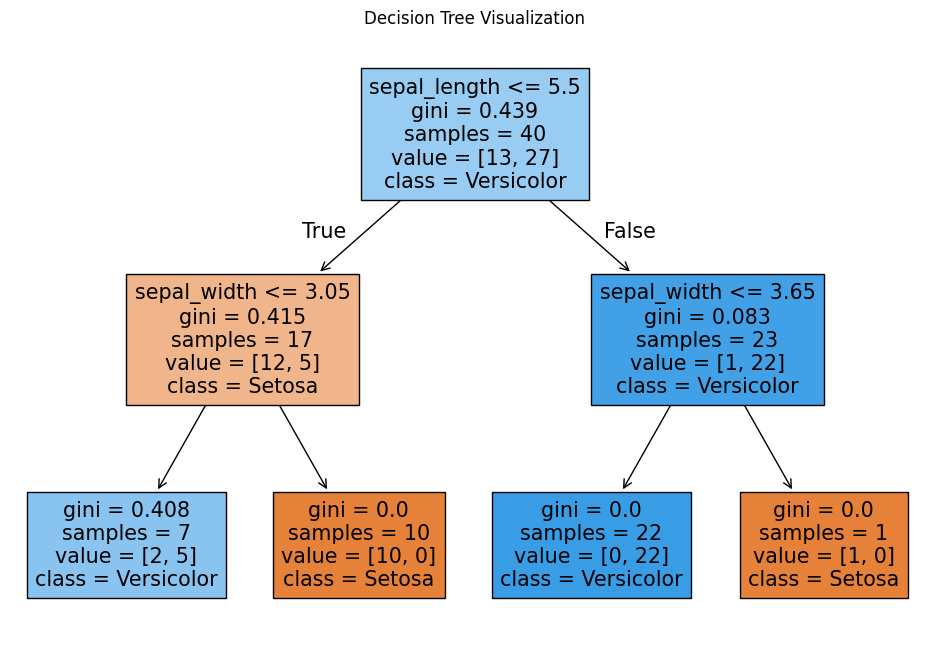

In [103]:
# Visualize the tree with plot_tree
from sklearn.tree import plot_tree

# Assuming `decision_tree_model` is your trained decision tree model
plt.figure(figsize=(12, 8))
plot_tree(sklearn_tree, feature_names=['sepal_length', 'sepal_width'], class_names=['Setosa', 'Versicolor'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()


We can easily read off the splits directly from the tree, which is super helpful.

## Shifting to Predicting Numerical Variables: Decision Tree Regressor — How It Differs

A **Decision Tree Regressor** works similarly to a classification tree, but instead of predicting classes, it predicts **continuous values**.  

- **Splitting Criterion:** Instead of **entropy/information gain**, we use measures of **variance reduction** or **mean squared error (MSE)**.  
  - At each split, the algorithm chooses the feature and threshold that **minimizes the variance** of the target values in the child nodes.  
  - Variance for a node \(S\) with \(n\) samples:
    $$
    \text{Var}(S) = \frac{1}{n} \sum_{i=1}^n (y_i - \bar{y})^2
    $$
    where \(\bar{y}\) is the mean of the target values in the node.  
  - The **best split** is the one that maximizes the **reduction in variance**:
    $$
    \Delta \text{Var} = \text{Var}(S) - \sum_{i=1}^{m} \frac{|S_i|}{|S|} \text{Var}(S_i)
    $$

- **Leaf Predictions:** Each leaf node predicts the **average of the target values** of the samples in that node.

- **Intuition:** Instead of separating classes, we split the data to produce nodes where the target values are as **homogeneous as possible**, reducing prediction error.

- **Key Difference from Classification:**  

| Classification       | Regression                 |
|---------------------|----------------------------|
| Predict classes      | Predict continuous values  |
| Use entropy / IG     | Use variance reduction / MSE |
| Leaf = most common class | Leaf = mean of target values |

**Summary:** Decision tree regression replaces class-based impurity with variance-based impurity but keeps the same hierarchical, greedy construction process.


## Using a DecisionTreeRegressor to predict StudentMarks dataset

Now, we will use what we know about Decision Tree Regressors to actually predict student grades given certain variables. In this case the `Student_Marks.csv` dataset contains factors such as how many courses each of 100 students are taking and how many hours studied.

With these two variables, we will predict their final grade.

| **Feature**        | **Description**                                              |
| ------------------ | ------------------------------------------------------------ |
| **number_courses** | Number of courses the student is enrolled in.                |
| **time_study**     | Total study time (e.g., hours per week or cumulative hours). |
| **Marks**          | Student’s performance score or grade (target variable).      |

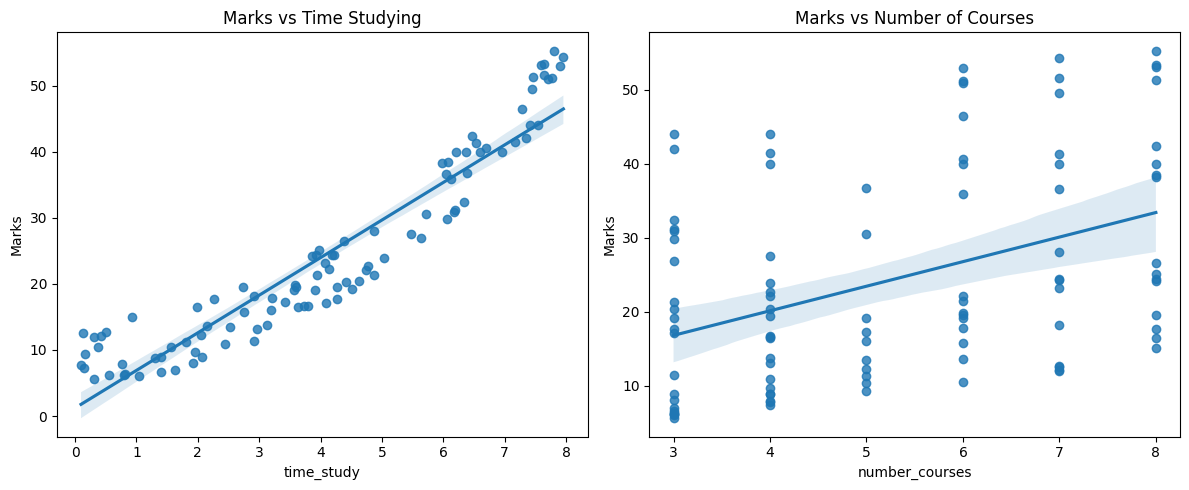

In [2]:
# Load dataset
grades_df = pd.read_csv('Student_Marks.csv')
# Divide data into features and target

# Let's visualize the data
# Make two scatter plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.regplot(data=grades_df, x='time_study', y='Marks')
plt.title('Marks vs Time Studying')
plt.subplot(1, 2, 2)
sns.regplot(data=grades_df, x='number_courses', y='Marks')
plt.title('Marks vs Number of Courses')
plt.tight_layout()
plt.show()

In [3]:
X = grades_df[['time_study', 'number_courses']]
y = grades_df['Marks']

X_train = X.sample(frac=0.8, random_state=42)
y_train = y[X_train.index]
X_test = X.drop(X_train.index)
y_test = y.drop(y_train.index)

# Create and train the decision tree regressor
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train.values, y_train.values)

In [4]:
# Predict on test set
y_pred = regressor.predict(X_test.values)
# Calculate Root Mean Squared Error
error = rmse(y_test.values, y_pred)
print(f"Root Mean Squared Error: {error:.2f}")

Root Mean Squared Error: 3.40


This value of 3.40 provides a good estimate on how far off our decision tree regressor is off. We can expect the difference between the true grade and the predicted grade to be off by about 3.4%. Not too bad!

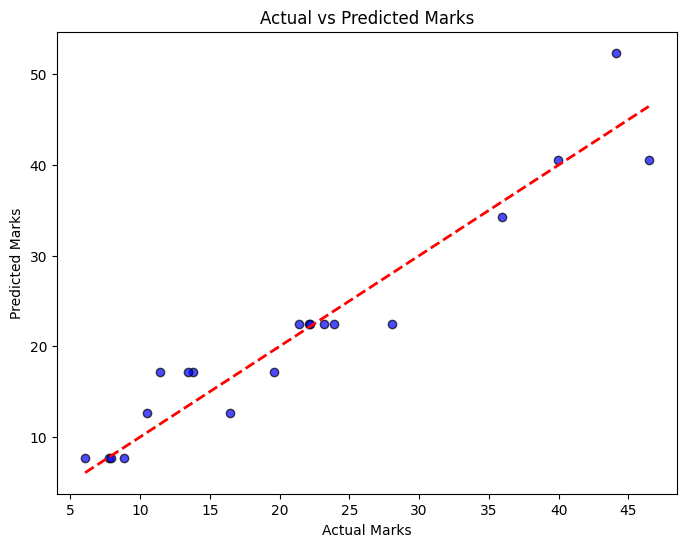

In [5]:
#Let's visualize the predictions vs actuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Marks')
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.show()

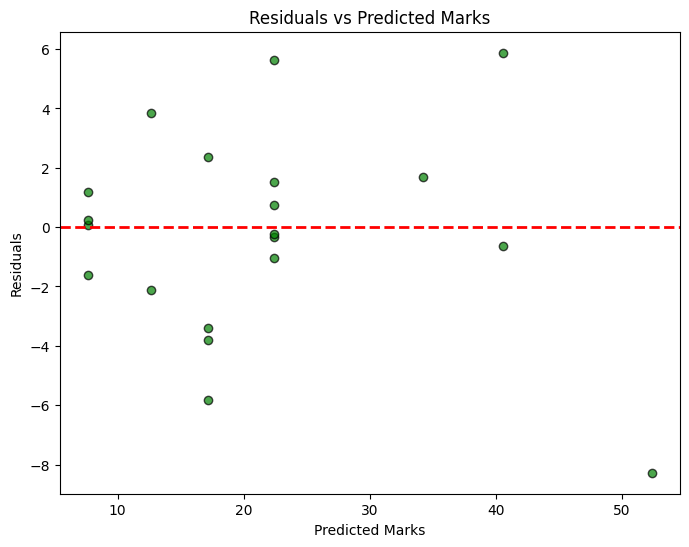

In [6]:
# Analysis of residuals vs predicted values
residuals = y_test.values - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green', edgecolor='k', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residuals vs Predicted Marks')
plt.xlabel('Predicted Marks')
plt.ylabel('Residuals')
plt.show()

Overall, there's not much of a pattern in the residuals vs. fitted values plot, so the model seems to have a good fit. The predicted values seem to be relatively close to the true values.